In [1]:
# Imports at the top of the notebook for ease of use
import numpy as np
import tensorflow as tf

%matplotlib inline
import matplotlib.pyplot as plt

To use TensorFlow in a Jupyter Notebook, we use an `InteractiveSession`. Again, it's easiest to declare this session at the top of the Notebook.

In [2]:
sess = tf.InteractiveSession()

# TensorFlow introduction

__1. Building the graph__

In [3]:
a = tf.constant(3.0, tf.float32)
b = tf.constant(4.0) # implicit tf.float32
print(a, b)

Tensor("Const:0", shape=(), dtype=float32) Tensor("Const_1:0", shape=(), dtype=float32)


__2. Running the graph__

The Python variables are `Tensors` rather than scalars. When we want to see their value, we have to run the graph.

In [4]:
print(sess.run([a, b]))

[3.0, 4.0]


__3. Operations__

In [5]:
s = tf.add(a, b) # alternative: s = a + b
print('s:', s)
print('sess.run(s):', sess.run(s))

s: Tensor("Add:0", shape=(), dtype=float32)
sess.run(s): 7.0


__4. Placeholders__

To feed in our own data, we can use placeholders.

In [6]:
a = tf.placeholder(tf.float32)
b = tf.placeholder(tf.float32)
s = a + b
print(sess.run(s, feed_dict={a: 4.0, b: 5.0}))
print(sess.run(s, feed_dict={a: [1.0, 2.0], b: [3.0, 3.0]}))

9.0
[ 4.  5.]


__5. Variables__

Besides constants, the graph can also contain trainable variables. These represent for example the weights of a neural network.

In [7]:
W = tf.Variable([0.03], tf.float32)
b = tf.Variable([-0.03], tf.float32)
x = tf.placeholder(tf.float32)
linear_model = W * x + b

`Variables` need to be initiated before we can use them.

In [8]:
sess.run(tf.global_variables_initializer())

In [9]:
print(sess.run(linear_model, feed_dict={x: [1, 2, 3, 4]}))

[ 0.          0.03        0.05999999  0.09      ]


# Training a linear model

The function defined by the above graph can be used to solve a regression problem. We'll generate some training data and fit our function to it.

__1. Generating training data__

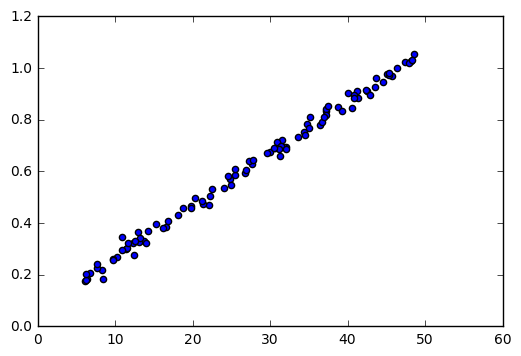

In [10]:
xs = np.random.uniform(5, 50, size=100)
ys = 2 * xs + 7 + np.random.normal(0, 2, size=100)
ys /= 100
plt.scatter(xs, ys)

__2. Our first prediction__

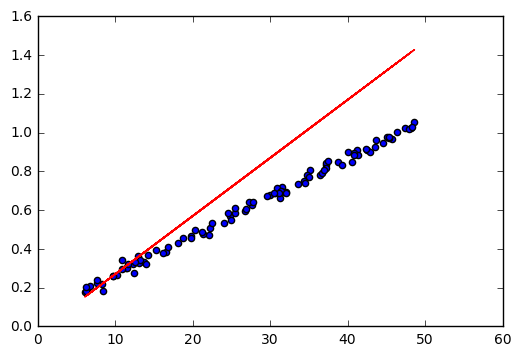

In [11]:
pred = sess.run(linear_model, feed_dict={x: xs})
plt.scatter(xs, ys)
plt.plot(xs, pred, color='red')

You can see how our initial function is completely off. We can define a loss as a metric for how "far off" our function is.

In [12]:
y = tf.placeholder(tf.float32)
epsilon = tf.constant(1e-8)
squared_delta = tf.square(linear_model - y + epsilon)
loss = tf.reduce_sum(squared_delta)
print(sess.run(loss, feed_dict={x: xs, y: ys}))

4.62352


We'll use the loss as a target for the gradient descent algorithm, trying to get it as low as possible, with respect to the parameters of our function.

__3. Training the model__

In [13]:
sess.run(tf.global_variables_initializer())

In [14]:
optimizer = tf.train.GradientDescentOptimizer(1e-5)
train_step = optimizer.minimize(loss)

In [15]:
for step in range(1000):
    sess.run(train_step, feed_dict={x: xs, y: ys})

print(sess.run([W, b]))

[array([ 0.02209928], dtype=float32), array([ 0.00031096], dtype=float32)]


__4. The trained model__

In [16]:
print(sess.run(loss, feed_dict={x: xs, y: ys}))

0.120962


You can see how our loss has decreased significantly. This can also be seen on the plot.

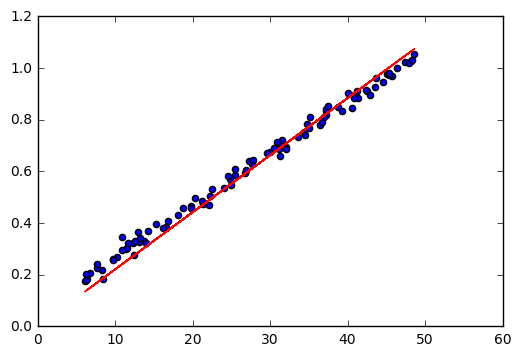

In [17]:
pred = sess.run(linear_model, feed_dict={x: xs})
plt.scatter(xs, ys)
plt.plot(xs, pred, color='red')